In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [5]:
df = pd.read_csv('./data/wine.csv', header=None)

In [6]:
X = df.iloc[:, : 12]
y = df.iloc[:,  12]

In [7]:
from sklearn.model_selection import train_test_split

In [ ]:
6497*0.2

In [ ]:
X.shape

In [ ]:
6487*0.8

In [ ]:
6487*0.2

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [23]:
# modelpath = "./model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
modelpath = "./model/all4/best_model.keras"

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# patience=20 검증셋의 오차가 20번이상 낮아지지 않을 경우 학습종료하라

In [22]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [24]:
checkpointer = ModelCheckpoint(
    filepath=modelpath, verbose=1, save_best_only=True)

In [25]:
model3 = Sequential()
model3.add(Dense(36, input_dim=12, activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy',
               optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=2000,
                      batch_size=500, validation_split=0.25, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/2000


c:\ProgramData\anaconda3\envs\mldltest2\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/8 ━━━━━━━━━━━━━━━━━━━━ 6s 947ms/step - accuracy: 0.2140 - loss: 3.6071
Epoch 1: val_loss improved from inf to 0.70827, saving model to ./model/all4/best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3161 - loss: 2.4996 - val_accuracy: 0.7662 - val_loss: 0.7083
Epoch 2/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7160 - loss: 0.8066
Epoch 2: val_loss did not improve from 0.70827
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7440 - loss: 0.8265 - val_accuracy: 0.7638 - val_loss: 0.8536
Epoch 3/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7640 - loss: 0.9327
Epoch 3: val_loss improved from 0.70827 to 0.56410, saving model to ./model/all4/best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7590 - loss: 0.8232 - val_accuracy: 0.7854 - val_loss: 0.5641
Epoch 4/2000
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7720 - loss: 0.6314
Epoch 4: val_loss improved from 0.56410 to 0.44910, saving model to ./model/all4/best_model.

validation_split  
검증 데이터로 사용될 훈련 데이터의 비율입니다. 모델은 훈련 데이터의 이 부분을 구분하고,각 에포크가 끝날 때 이 데이터에 대한 손실과 모델 측정항목을 평가

In [26]:
history3

In [27]:
history3.history

{'accuracy': [0.7503207325935364,
  0.8675904273986816,
  0.8911983370780945,
  0.9094175100326538,
  0.9178855419158936,
  0.925070583820343,
  0.925070583820343,
  0.9258403778076172,
  0.9273800253868103,
  0.9289196729660034,
  0.9289196729660034,
  0.9289196729660034,
  0.9307159185409546,
  0.9309725165367126,
  0.9314857721328735,
  0.9309725165367126,
  0.9325121641159058,
  0.9332820177078247,
  0.9317423701286316,
  0.9332820177078247,
  0.9340518116950989,
  0.9332820177078247,
  0.9348216652870178,
  0.9353348612785339,
  0.9363613128662109,
  0.937900960445404,
  0.937644362449646,
  0.9391840100288391,
  0.9394406080245972,
  0.9394406080245972,
  0.9420066475868225,
  0.9412368535995483,
  0.9435462951660156,
  0.9427765011787415,
  0.9440595507621765,
  0.9458557963371277,
  0.9473954439163208,
  0.9463689923286438,
  0.9468821883201599,
  0.9489350914955139,
  0.9499614834785461,
  0.949191689491272,
  0.9509879350662231,
  0.9497048854827881,
  0.9515011310577393,
  0

In [26]:
history3_df = pd.DataFrame(history3.history)

In [27]:
history3_df

,accuracy,loss,val_accuracy,val_loss
0,0.434180,1.778844,0.766154,0.708265
1,0.756223,0.840709,0.763846,0.853611
2,0.762638,0.756714,0.785385,0.564102
3,0.806005,0.492117,0.831538,0.449095
4,0.840390,0.418300,0.845385,0.367764
...,...,...,...,...
428,0.986143,0.053996,0.980769,0.056187
429,0.983064,0.058399,0.982308,0.051699
430,0.984604,0.057441,0.981538,0.054310
431,0.983577,0.060338,0.980000,0.055343


In [28]:
y_loss = history3_df['loss']
y_vloss = history3_df['val_loss']

In [16]:
import numpy as np

In [29]:
len(y_loss)

433

In [30]:
x_len = np.arange(len(y_loss))

In [31]:
import matplotlib.pyplot as plt

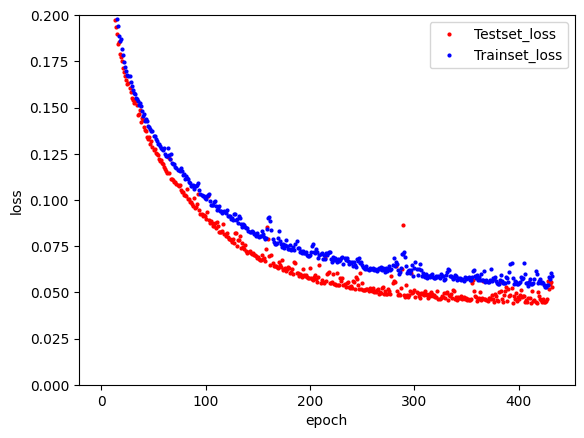

In [32]:
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss,  "o", c="blue", markersize=2, label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim(0, 0.2)
plt.show()

In [33]:
model3.evaluate(X_test, y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9840 - loss: 0.0418 


[0.05562335625290871, 0.9815384745597839]